PROBLEM STATEMENT :

Landslides are a significant natural hazard causing severe damage to lives,
infrastructure, and the environment. Predicting landslide-prone areas based
on environmental and geological data can help in early warning systems
and disaster management planning.

DESCRIPTION :

This project aims to build a machine learning model (Decision Tree/Random Forest)
to predict the occurrence of landslides using features such as slope, precipitation,
elevation, lithology, NDVI, etc.

In [78]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder



In [79]:
dataset = pd.read_csv("/content/landslide_predictdata.csv")

In [80]:
dataset

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,1,4,2,1,4,2,5,1,5,3,2,4,2
1208,1,4,5,1,5,3,5,1,5,5,2,1,5
1209,1,3,4,1,5,2,5,2,3,3,2,2,5
1210,1,2,2,1,3,1,1,5,1,1,1,3,3


In [81]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


In [82]:
dataset.nunique()

,0
Landslide,2
Aspect,5
Curvature,5
Earthquake,3
Elevation,5
Flow,5
Lithology,6
NDVI,5
NDWI,5
Plan,5


In [83]:
dataset.describe()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,0.500000,2.962046,2.977723,2.102310,2.436469,2.338284,1.948845,3.042904,2.773927,3.059406,3.813531,3.262376,2.811881
std,0.500206,1.147378,1.099658,0.669812,1.242686,1.112686,1.424345,1.239246,1.299830,1.057287,1.347799,1.039502,1.194229
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,0.500000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
75%,1.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000
max,1.000000,5.000000,5.000000,3.000000,5.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [84]:
dataset.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [85]:
dataset.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope'],
      dtype='object')

In [86]:
dataset.shape

(1212, 13)

/tmp/ipython-input-3535732986.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Landslide', data=dataset, palette="viridis")


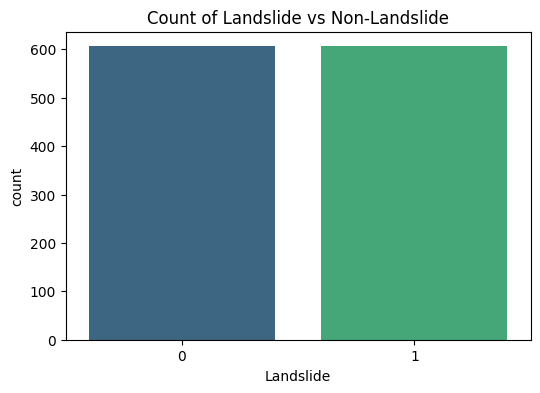

In [87]:
plt.figure(figsize=(6,4))
sns.countplot(x='Landslide', data=dataset, palette="viridis")

plt.title("Count of Landslide vs Non-Landslide")
plt.show()

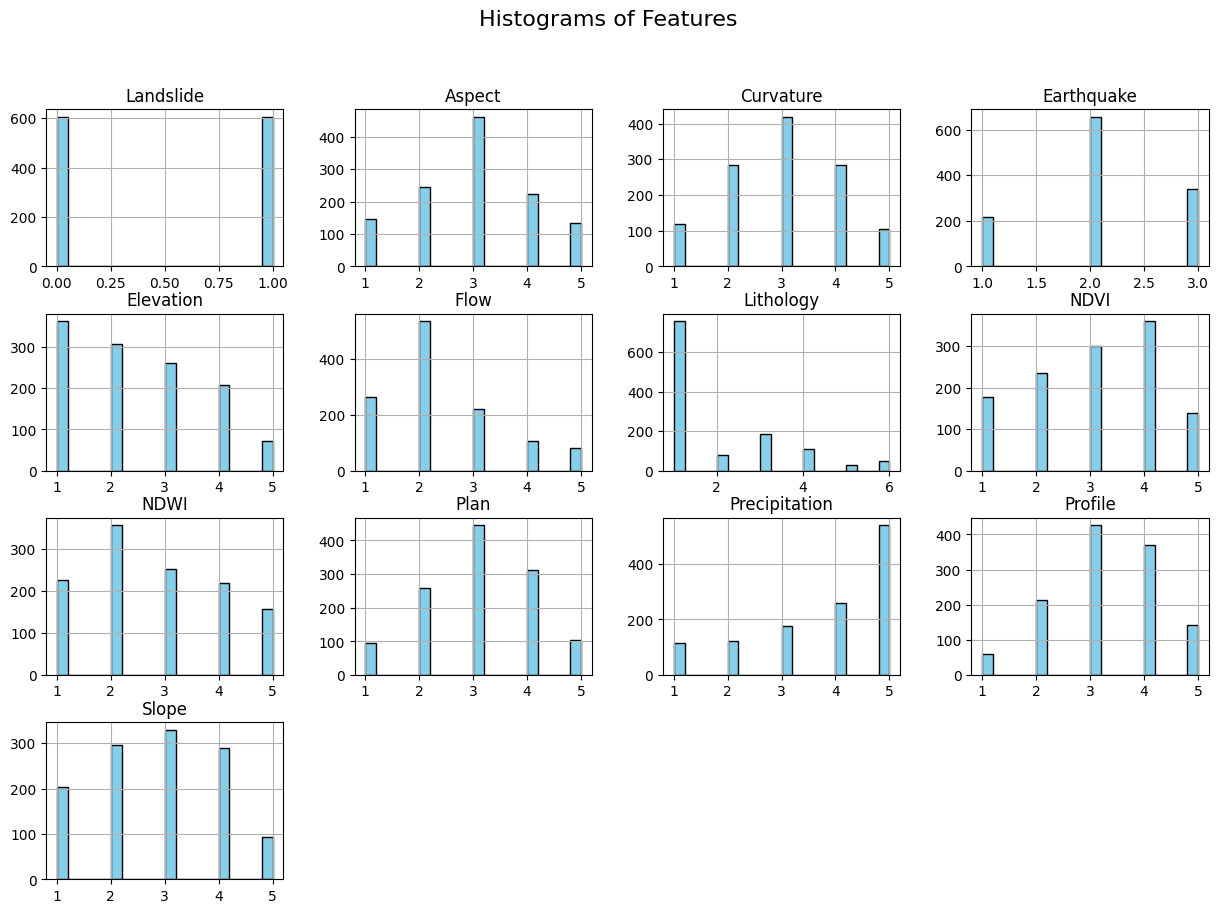

In [88]:
dataset.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

/tmp/ipython-input-921459691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Landslide', data=dataset, palette="Set2")


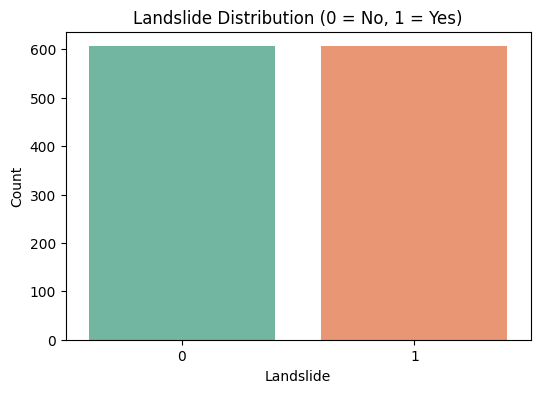

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(x='Landslide', data=dataset, palette="Set2")
plt.title("Landslide Distribution (0 = No, 1 = Yes)")
plt.xlabel("Landslide")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-2232780339.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Landslide', y='Elevation', data=dataset, palette="mako")


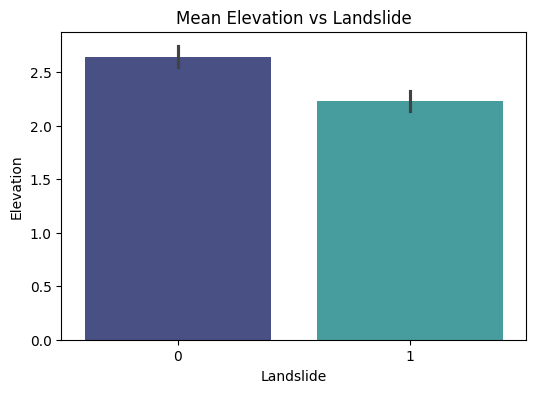

In [90]:
plt.figure(figsize=(6,4))
sns.barplot(x='Landslide', y='Elevation', data=dataset, palette="mako")
plt.title("Mean Elevation vs Landslide")
plt.show()

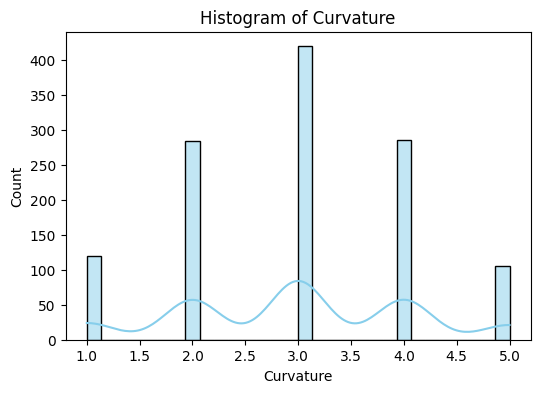

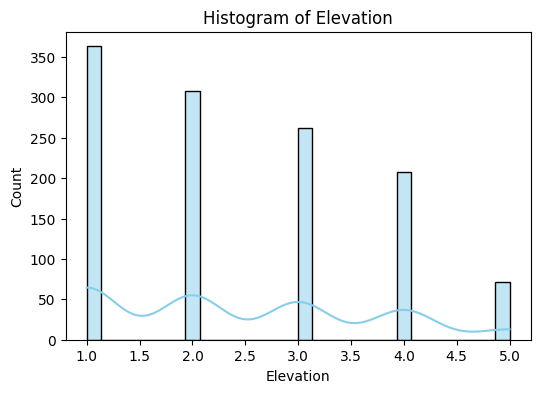

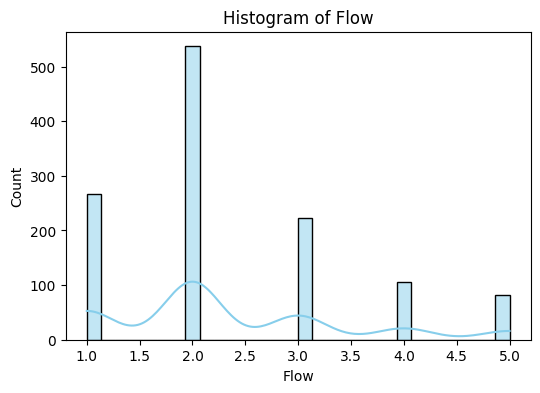

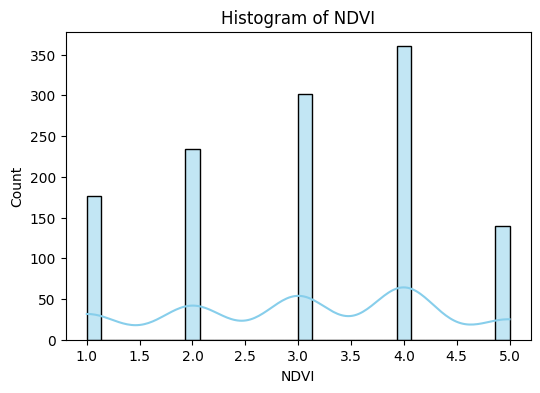

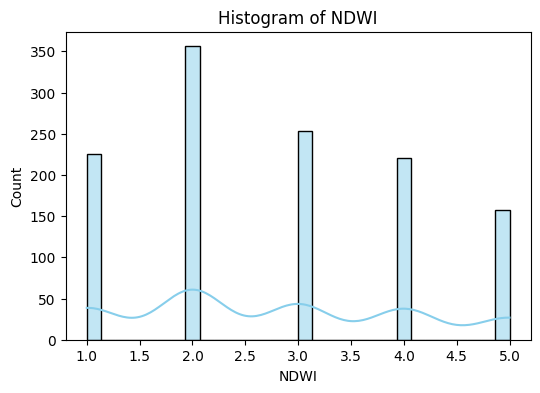

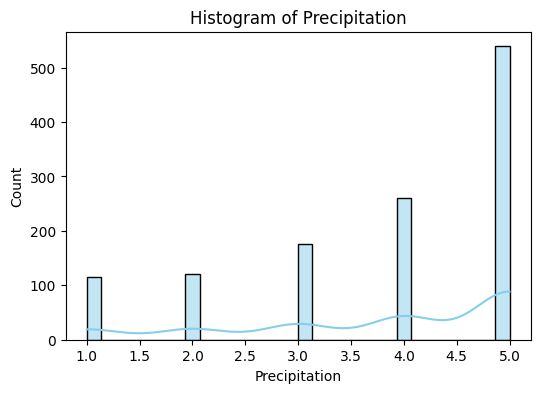

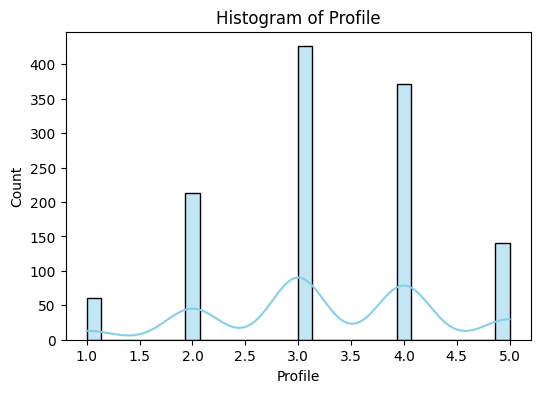

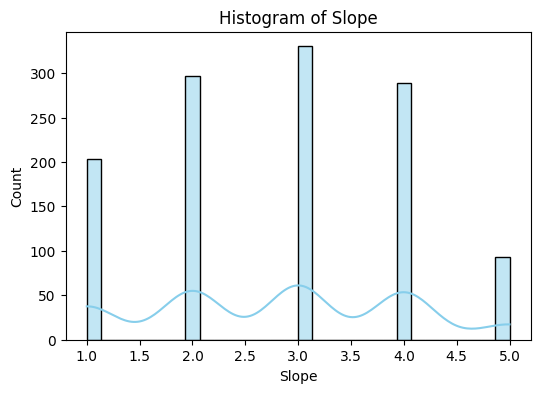

In [91]:
num_cols = ['Curvature','Elevation','Flow','NDVI','NDWI','Precipitation','Profile','Slope']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(dataset[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.show()

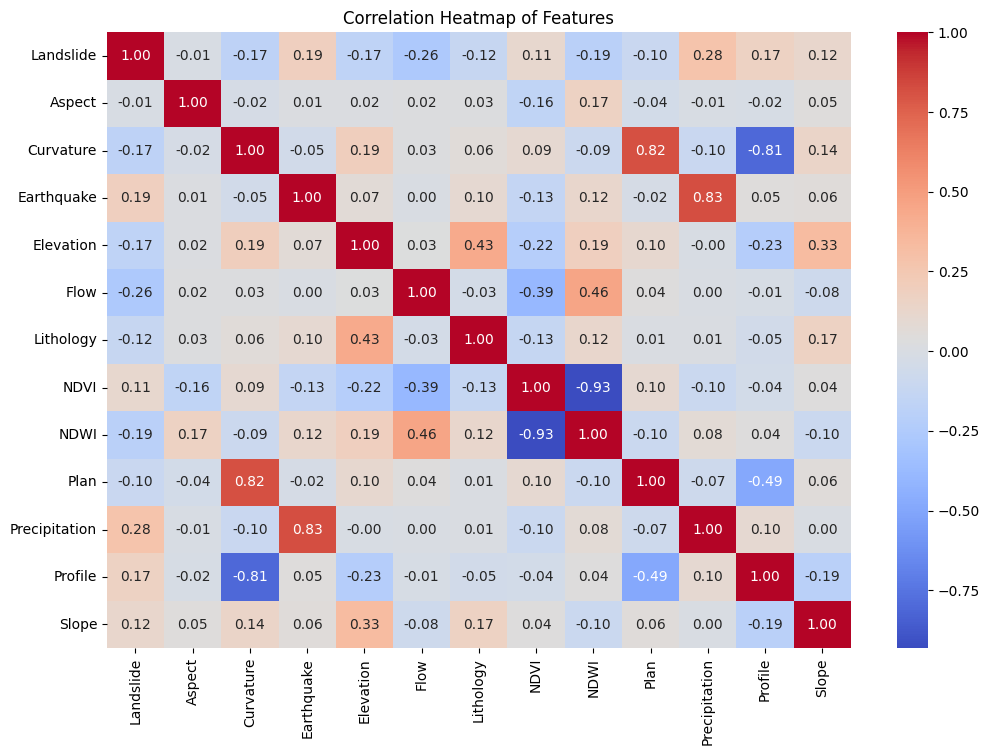

In [92]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

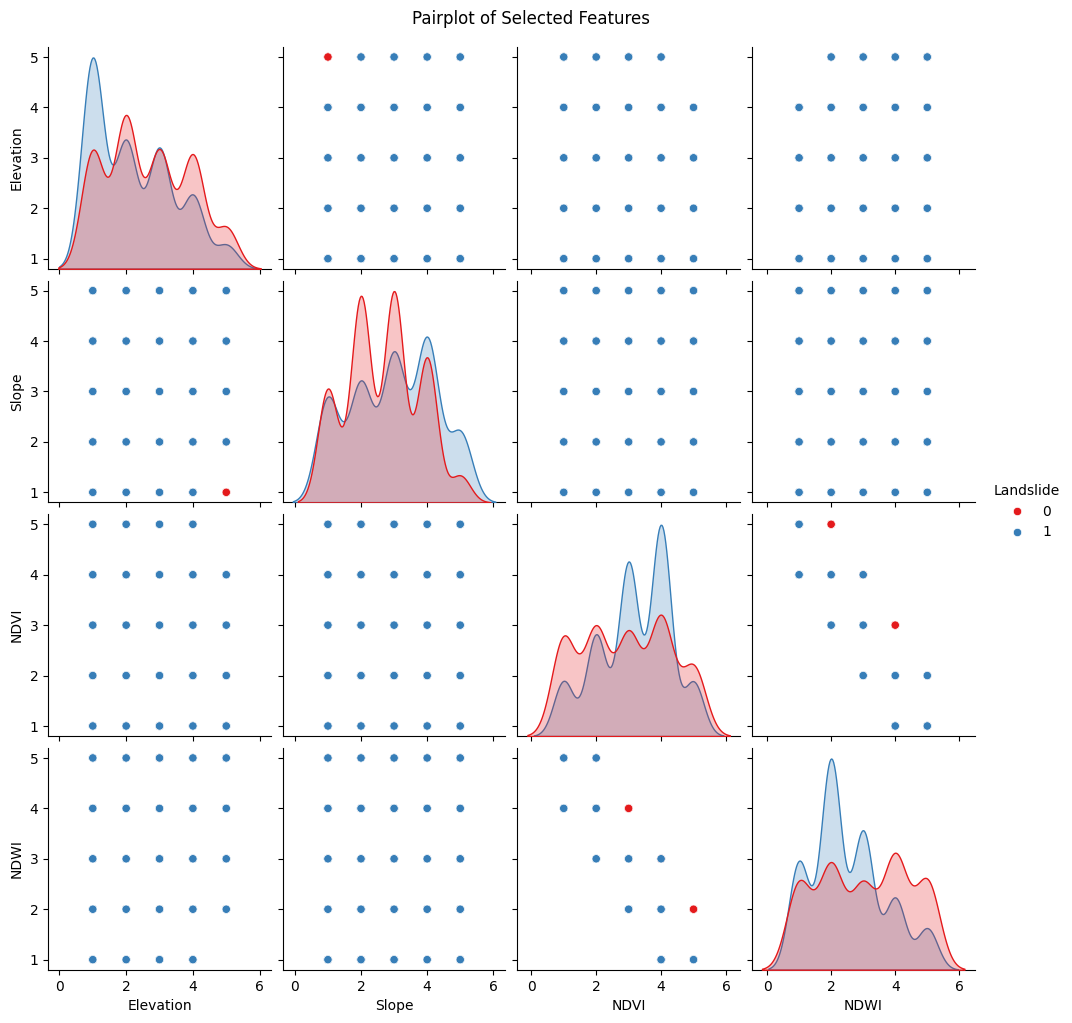

In [93]:
sns.pairplot(dataset[['Elevation','Slope','NDVI','NDWI','Landslide']], hue="Landslide", palette="Set1")
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

/tmp/ipython-input-2839894158.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Landslide', y='Elevation', data=dataset, palette="Set3")


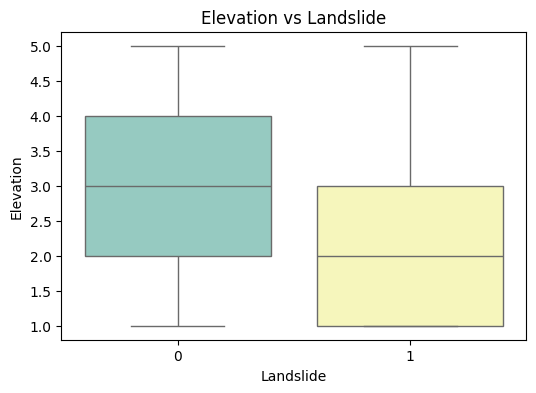

In [94]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Landslide', y='Elevation', data=dataset, palette="Set3")
plt.title("Elevation vs Landslide")
plt.show()

In [95]:
X=dataset.drop('Landslide',axis=1)
y=dataset['Landslide']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [97]:
X_train.shape

(969, 12)

In [98]:
X_test.shape

(243, 12)

In [99]:
X_test.shape

(243, 12)

In [100]:
scaler = StandardScaler()
num_cols = X_train.columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

/tmp/ipython-input-2027755571.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette="viridis")


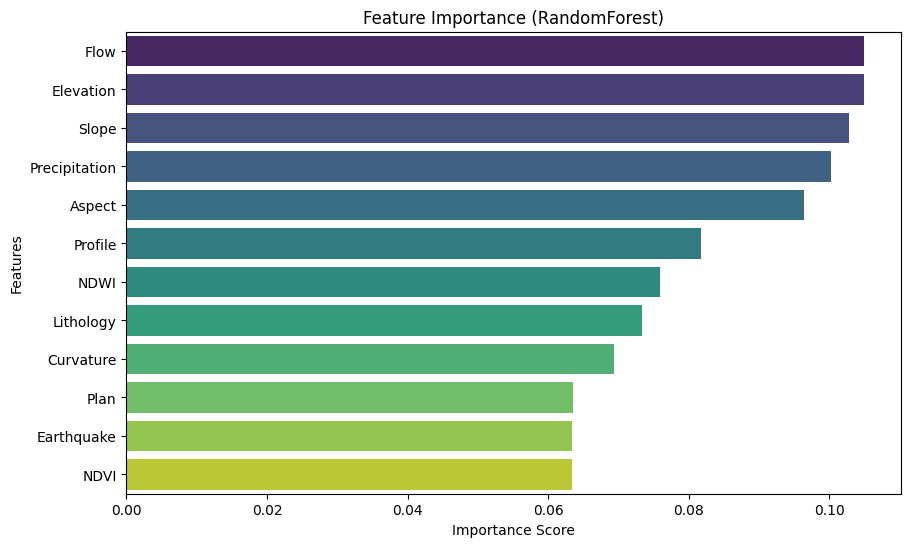

In [101]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importance (RandomForest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

In [102]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [103]:
with open('model1.pkl', 'wb') as file:
    pickle.dump(rf, file)

In [104]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [105]:
with open('model2.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

In [106]:
# Predict on test set
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

In [107]:
# Random Forest Accuracy
accuracy_score(y_test, y_pred_rf)

0.7695473251028807

In [108]:
# Decision Tree Accuracy
accuracy_score(y_test, y_pred_dt)

0.6790123456790124

In [109]:
# Random Forest Confusion Matrix
confusion_matrix(y_test, y_pred_rf)

array([[101,  37],
       [ 19,  86]])

In [110]:
# Decision Tree Confusion Matrix
confusion_matrix(y_test, y_pred_dt)

array([[89, 49],
       [29, 76]])

In [111]:
# Random Forest Report
classification_report(y_test, y_pred_rf)

'              precision    recall  f1-score   support\n\n           0       0.84      0.73      0.78       138\n           1       0.70      0.82      0.75       105\n\n    accuracy                           0.77       243\n   macro avg       0.77      0.78      0.77       243\nweighted avg       0.78      0.77      0.77       243\n'

In [112]:
# Decision Tree Report
classification_report(y_test, y_pred_dt)

'              precision    recall  f1-score   support\n\n           0       0.75      0.64      0.70       138\n           1       0.61      0.72      0.66       105\n\n    accuracy                           0.68       243\n   macro avg       0.68      0.68      0.68       243\nweighted avg       0.69      0.68      0.68       243\n'

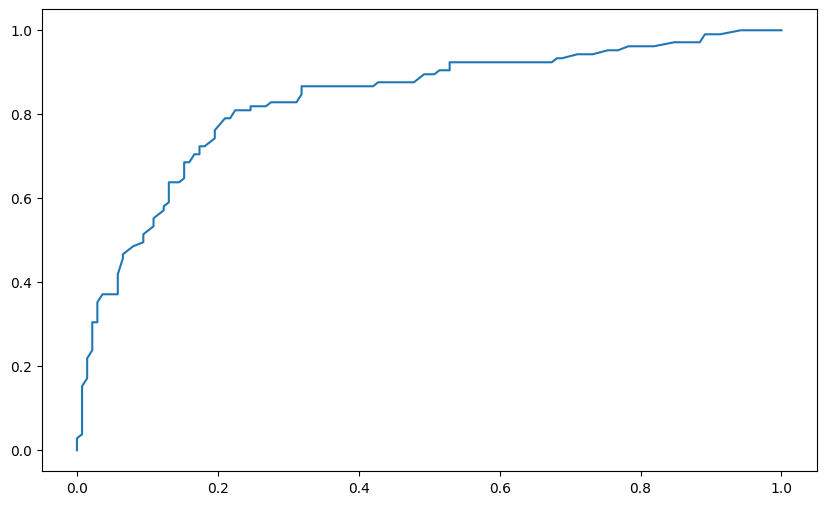

In [113]:
plt.figure(figsize=(10,6))
# Random Forest ROC
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # probability of positive class
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {roc_auc_rf:.2f}')

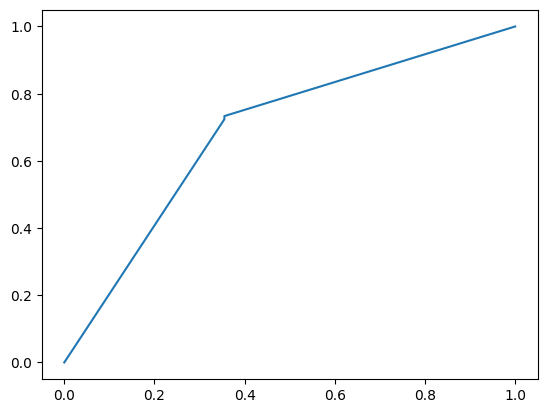

In [114]:
# Decision Tree ROC
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree AUC = {roc_auc_dt:.2f}')

/tmp/ipython-input-992991893.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


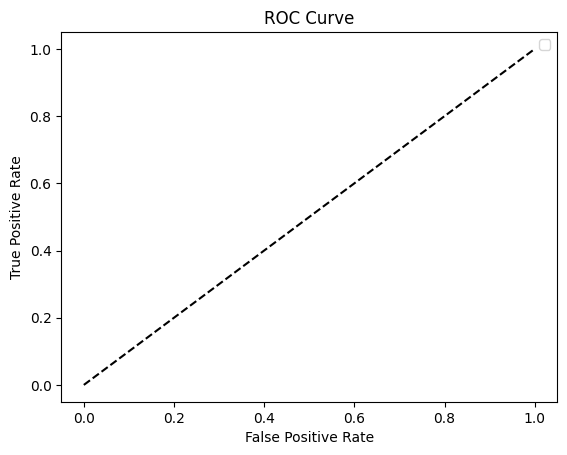

In [115]:
# Diagonal line for reference
plt.plot([0,1],[0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()